## Teoría de perturbaciones

Consiste en resolver un sistema perturbado(se conoce la solución al no perturbado), y donde el interés es conocer la contribución de la parte perturbada $H'$ al nuevo sistema total. 

$$ H = H^{0} + H'$$

Para sistemas no degenerados, la corrección a la energía a primer orden se calcula como 

$$ E_{n}^{(1)} = \int\psi_{n}^{(0)*} H' \psi_{n}^{(0)}d\tau$$

** Tarea 1 : Programar esta ecuación si conoces $H^{0}$ y sus soluciones. **

In [13]:
### Solución
#Importar de sympy el hamiltoniano y eigenfunciones para el oscilador armónico cuántico
from sympy.physics.qho_1d import psi_n
from sympy.physics.qho_1d import E_n
from sympy import *
from sympy import init_printing; init_printing(use_latex = 'mathjax')

n, m, m_e, omega, hbar = symbols('n m m_e omega hbar', real = True, constant = True)
var('x')

m_e = 9.10938356e-31
#Necesitamos seleccionar un nivel energético, sobre el cual realizar la corrección debida a la perturbación
n = Abs(sympify(input('Energy level upon which we should perform the perturbation: ')))
omega = sympify(input('Angular frequency, 1 is suggested: '))
#Unperturbed wavefunctions
wavefuncn = psi_n(n, x, m_e, omega)

#Energía previa a la perturbación
E0 = E_n(n, omega)
#Necesitamos definir un nuevo hamiltoniano. Este debe contener el original y agregar la perturbación

H = ((-hbar**2)/(2*m_e)*diff(wavefuncn, x, 2) + wavefuncn*(m_e*(omega*x)**2)/2) + wavefuncn*sympify(input('Perturbation: '))

#Energy of the unperturbed H.O. Hamiltonian
E0 = E_n(n, omega)
E0


#here we perform the inner product integral
innerproduct = conjugate(wavefuncn)*H                                  
E = E0 + integrate(innerproduct, (x, -oo,oo))
PorcErr = (((E-E0)*100)/E0)

E




Energy level upon which we should perform the perturbation: 2
Angular frequency, 1 is suggested: 3
Perturbation: x


       2                     
3.75⋅h̅    0.125⋅√ℏ          
──────── - ──────── + 11.25⋅ℏ
   ℏ          √π             

Y la corrección a la función de onda, también a primer orden, se obtiene como:

 $$ \psi_{n}^{(1)} = \sum_{m\neq n} \frac{\langle\psi_{m}^{(0)} | H' | \psi_{n}^{(0)} \rangle}{E_{n}^{(0)} - E_{m}^{(0)}} \psi_{m}^{(0)}$$

**Tarea 2: Programar esta ecuación si conoces $H^{0}$ y sus soluciones. **

Energy level for which we are going to calculate the corrected wavefunction: 2
Highest energy level we are going to consider:5
Angular frequency, 1 is suggested: 2
Perturbation: x**2


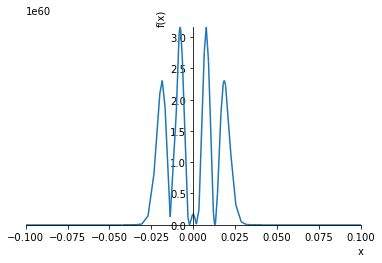

In [14]:
### Solución
#Importar de sympy el hamiltoniano y eigenfunciones para el oscilador armónico cuántico
from sympy.physics.qho_1d import psi_n
from sympy.physics.qho_1d import E_n
from sympy import *
from sympy import init_printing; init_printing(use_latex = 'mathjax')

n, m, m_e, omega, hbar = symbols('n m m_e omega hbar', real = True, constant = True)
var('x')

m_e = 9.10938356e-31
#Necesitamos seleccionar un nivel energético, sobre el cuál realizar la corrección debida a la perturbación
n = Abs(sympify(input('Energy level for which we are going to calculate the corrected wavefunction: ')))
i= Abs(sympify(input('Highest energy level we are going to consider:')))
omega = sympify(input('Angular frequency, 1 is suggested: '))
#Unperturbed wavefunctions
wavefuncn = psi_n(n, x, m_e, omega)

#Energía previa a la perturbación
E0 = E_n(n, omega)

#Necesitamos definir un nuevo Hamiltoniano. Este debe contener el original y agregar la perturbación.

H =  wavefuncn*sympify(input('Perturbation: '))

#Energy of the unperturbed H.O. Hamiltonian
E0 = E_n(n, omega)
psicorr = 0

for m in range(i):
    if m !=n:
        psim= psi_n(m, x, m_e, omega)
        product = conjugate(psim)*H
        innerproduct = integrate(product, (x,-oo,oo))
        Em = E_n(m, omega)
        corr = ((innerproduct)/(E0-Em))*psim
        psicorr = psicorr + corr
    
    
    else:
        psicorr = psicorr
        
#inner product integral
innerproduct = conjugate(wavefuncn)*H                                  
E = E0 + integrate(innerproduct, (x, -oo,oo))
Err = (((E-E0)*100)/E0)

psipert = wavefuncn + psicorr
psipert.evalf()
psiplot = conjugate(psipert)*psipert
E
plot(psiplot,(x,-0.1,0.1))

**Tarea 3: Investigue las soluciones a segundo orden y también programe las soluciones. **

In [15]:
### Solución
#La forma es extremadamente similar para la corrección de la energía a segundo orden. Solo trabajamos con energía
#en vez de funciones de onda.
#Importar de sympy el Hamiltoniano y eigenfunciones para el oscilador armónico cuántico
from sympy.physics.qho_1d import psi_n
from sympy.physics.qho_1d import E_n
from sympy import *
from sympy import init_printing; init_printing(use_latex = 'mathjax')

n, m, m_e, omega, hbar = symbols('n m m_e omega hbar', real = True, constant = True)
var('x')

m_e = 9.10938356e-31
#Necesitamos seleccionar un nivel energético, sobre el cuál realizar la corrección debida a la perturbación
n = Abs(sympify(input('Energy level for which we are going to calculate the energy correction: ')))
i= Abs(sympify(input('Highest energy level we are going to consider for our calculations:')))
omega = sympify(input('Angular frequency, 1 is suggested: '))
#Unperturbed wavefunctions
wavefuncn = psi_n(n, x, m_e, omega)

#Energía previa a la perturbación
E0 = E_n(n, omega)

#Necesitamos definir un nuevo hamiltoniano. Este debe contener el original y agregar la perturbación

H =  wavefuncn*sympify(input('Perturbation: '))

integrandoprimerorden = conjugate(wavefuncn)*H
primerorden = integrate (integrandoprimerorden, (x,-oo,oo))
#Energy of the unperturbed H.O. Hamiltonian
E0 = E_n(n, omega)
Ecorr = 0

#La primera parte de la corrección a 2º orden es la de primer orden


for m in range(i):
    if m !=n:
        psim= psi_n(m, x, m_e, omega)
        product = conjugate(psim)*H
        innerproduct = integrate(product, (x,-oo,oo))
        Em = E_n(m, omega)
        corr = ((innerproduct)**2/(E0-Em))
        Ecorr = Ecorr + corr
    
    
    else:
        Ecorr = Ecorr


E2 = E0 + primerorden + Ecorr

E2
#plot(psiplot,(x,-0.1,0.1))



Energy level for which we are going to calculate the energy correction: 1
Highest energy level we are going to consider for our calculations:2
Angular frequency, 1 is suggested: 2
Perturbation: x


3⋅ℏ + 1.37221140351236e+29

**Tarea 4.  Resolver el átomo de helio aplicando los programas anteriores.** 

In [16]:

from sympy.physics.hydrogen import E_nl, R_nl
var('r1, r2, q', positive=True, real=True)



def Helium(N1,N2,L1,L2):
    
    Eb=E_nl(N1,1)+E_nl(N2,1)
    Psi1=R_nl(N1, L1, r1, Z=1)
    Psi2=R_nl(N2, L2, r2, Z=1)
    Psi=Psi1*Psi2
    E_correction1 = integrate(integrate(r1**2*r2**2*conjugate(Psi1)*conjugate(Psi2)*q**2*Psi1*Psi2/abs(r1-r2), (r1,0,oo)), (r2,0,oo))
    E_correctionR1 = q**2*integrate(r2**2*conjugate(Psi2)*Psi2*(integrate(r1**2*conjugate(Psi1)*Psi1/r2, (r1,0,r2))+integrate(r1**2*conjugate(Psi1)*Psi1/r1, (r1,r2,oo))), (r2,0,oo))
    
    return Psi, Eb, E_correction1, E_correctionR1


    E_correction1, E_correctionR1
    
Helium (1,1,0,0)     

⎛                       ∞                                          ⎞
⎜                       ⌠                                          ⎟
⎜                       ⎮            ∞                             ⎟
⎜                       ⎮            ⌠                             ⎟
⎜                       ⎮            ⎮   2  -2⋅r₁                 2⎟
⎜   -r₁  -r₂          2 ⎮   2  -2⋅r₂ ⎮ r₁ ⋅ℯ                   5⋅q ⎟
⎜4⋅ℯ   ⋅ℯ   , -1, 16⋅q ⋅⎮ r₂ ⋅ℯ     ⋅⎮ ────────── d(r₁) d(r₂), ────⎟
⎜                       ⎮            ⎮ │r₁ - r₂│                8  ⎟
⎜                       ⎮            ⌡                             ⎟
⎜                       ⎮            0                             ⎟
⎜                       ⌡                                          ⎟
⎝                       0                                          ⎠

**Tarea 5: Método variacional-perturbativo. **

Este método nos permite estimar de forma precisa $E^{(2)}$ y correcciones perturbativas de la energía de órdenes más elevados para el estado fundamental del sistema, sin evaluar sumas infinitas. Ver ecuación 9.38 del libro. 

**Resolver el átomo de helio, considerando este método (sección 9.4), como mejor le parezca. **

**Tarea 6. Revisar sección 9.7. **

Inicialmente a mano, y sengunda instancia favor de intentar programar sección del problema, i.e. integral de Coulomb  e integral de intercambio.

## Siguiente: Segunda parte, Octubre
Simetrías moleculares y Hartree-Fock

In [ ]:
def hov:
    